In [ ]:
SphereStats
├── SphereStats/                 # Main library directory
│   ├── __init__.py              # Makes SphereStats a package
│   ├── convex_hull.py           # Convex hull calculations and plotting
│   ├── distance_calculations.py # Distance calculation utilities
│   ├── flight_travel.py         # Flight-related calculations
│   ├── great_circle.py          # Great circle distance utilities
│   ├── heatmap.py               # Heatmap plotting utilities
│   ├── isochrone_travel.py      # Isochrone (time-based regions) utilities
│   ├── main.py                  # Main entry point or demo script
│   ├── midpoint.py              # Midpoint calculation utilities
│   ├── network_routing.py       # Network routing logic and utilities
│   ├── point_to_line_distance.py# Point-to-line distance calculations
│   ├── sphere_midpoint.py       # Spherical midpoint calculations
│   ├── sphere_stats.py          # High-level statistics for spherical data
│   ├── spherical_geometry.py    # Spherical geometry utilities
│   ├── waypoints.py             # Waypoints-related calculations
│   └── __pycache__/             # Compiled Python files (auto-generated)
│
├── data/                        # Data directory for any example data files
│
├── setup.py                     # Setup script for installing the library
├── SphereStats.egg-info/        # Metadata about the installed package
├── build/                       # Directory for build artifacts
├── dist/                        # Directory for distribution artifacts (e.g., .whl files)
├── tests/                       # Directory for unit tests
│   ├── __init__.py              # Makes tests a package
│   ├── test_convex_hull.py      # Tests for convex_hull.py
│   ├── test_distance_calculations.py # Tests for distance_calculations.py
│   ├── test_flight_travel.py    # Tests for flight_travel.py
│   ├── test_great_circle.py     # Tests for great_circle.py
│   ├── test_heatmap.py          # Tests for heatmap.py
│   ├── test_isochrone_travel.py # Tests for isochrone_travel.py
│   ├── test_midpoint.py         # Tests for midpoint.py
│   ├── test_network_routing.py  # Tests for network_routing.py
│   ├── test_point_to_line_distance.py # Tests for point_to_line_distance.py
│   ├── test_spherical_geometry.py    # Tests for spherical_geometry.py
│   ├── test_waypoints.py        # Tests for waypoints.py
│   └── __pycache__/             # Compiled Python files (auto-generated)
│
└── Setup/                       # (Optional) Custom setup scripts (not standard)



### **SphereStats**: A Comprehensive Geospatial Analysis Library

**SphereStats** provides a robust suite of tools for geospatial analysis on spherical data. It includes a range of functions for calculating great-circle distances, plotting routes on maps, and performing geometric operations such as convex hulls, clustering, and proximity analysis. The library is designed to handle complex geospatial tasks, making it an ideal solution for applications in navigation, urban planning, environmental monitoring, and more.

With **SphereStats**, users can:

1. **Perform Distance Calculations**: Easily calculate great-circle distances between two points on Earth using the Haversine formula or geodesic methods.
2. **Route Plotting and Visualization**: Plot great-circle routes between two points on various map projections, visualizing the shortest paths and geographic contexts.
3. **Convex Hulls and Geometric Analysis**: Compute convex hulls to analyze the outer boundaries of point sets on a sphere and visualize them in 2D and 3D.
4. **Clustering and Proximity Queries**: Analyze and cluster points based on proximity or specific time thresholds, providing insights into geographical distribution and network behavior.
5. **Advanced Visualization**: Visualize geospatial data in various map projections (e.g., Mercator, Mollweide) and 3D, enabling better understanding of the spatial relationships between points.

These functions are designed to be modular and adaptable to a wide range of real-world geospatial challenges, offering users a versatile toolkit for geographic data analysis.

---

### **Real-World Applications**:

1. **Navigation and Routing**: Optimize travel routes and analyze the most efficient paths between two or more locations.
2. **Environmental Monitoring**: Track and analyze spatial patterns related to environmental data, such as climate change or wildlife movement.
3. **Urban Planning**: Use proximity analysis and clustering for resource allocation and city development strategies.
4. **Geospatial Research**: Aid in research across various fields by providing tools to model and analyze spherical data.
5. **Educational Tools**: Enhance understanding of geospatial concepts and the impact of different map projections in educational settings.


# Explanation for the code block
"""
This block of code defines three key functionalities:
1. **to_cartesian**: Converts latitude and longitude into Cartesian coordinates for 3D calculations.
2. **haversine**: Computes the shortest great-circle distance between two points on Earth.
3. **plot_great_circle_with_stats**: Visualizes the great-circle path and provides distance statistics in 3D.

These functions are applied to calculate and plot the shortest path between Warsaw and Rome.
Feel free to modify the coordinates to explore other locations.
"""


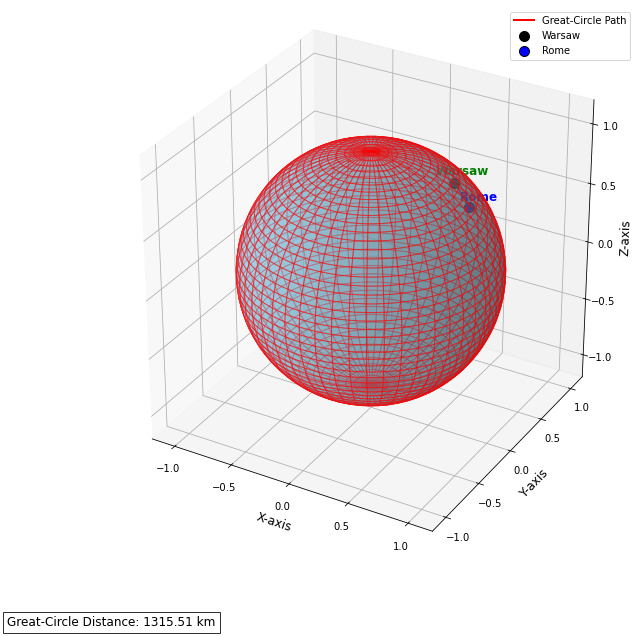

In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Utility function: Convert latitude and longitude to Cartesian coordinates
def to_cartesian(lat, lon, radius=1):
    lat, lon = np.radians(lat), np.radians(lon)
    x = radius * np.cos(lat) * np.cos(lon)
    y = radius * np.cos(lat) * np.sin(lon)
    z = radius * np.sin(lat)
    return np.array([x, y, z])

# Haversine function: Calculate great-circle distance
def haversine(lat1, lon1, lat2, lon2, radius=6371):  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return radius * c

# Plot function
def plot_great_circle_with_stats(lat1, lon1, lat2, lon2):
    # Create a sphere
    phi, theta = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Convert points to Cartesian
    p1 = to_cartesian(lat1, lon1)
    p2 = to_cartesian(lat2, lon2)

    # Interpolate great-circle path
    t = np.linspace(0, 1, 100)
    path = np.array([(1 - ti) * p1 + ti * p2 for ti in t])
    path /= np.linalg.norm(path, axis=1)[:, None]  # Normalize to unit sphere

    # Calculate great-circle distance
    distance_km = haversine(lat1, lon1, lat2, lon2)

    # Plot sphere and path
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere
    ax.plot_surface(x, y, z, color='skyblue', alpha=0.5, edgecolor='red')
    
    # Plot the great-circle path
    ax.plot(path[:, 0], path[:, 1], path[:, 2], color='red', linewidth=2, label='Great-Circle Path')

    # Plot the two points
    ax.scatter(*p1, color='black', s=100, edgecolors='black', label='Warsaw')
    ax.scatter(*p2, color='blue', s=100, edgecolors='black', label='Rome')

    # Add labels near the points
    ax.text(*p1 * 1.1, 'Warsaw', color='green', fontsize=12, ha='center', weight='bold')
    ax.text(*p2 * 1.1, 'Rome', color='blue', fontsize=12, ha='center', weight='bold')

    # Add axes and grid
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_zlabel('Z-axis', fontsize=12)
    ax.grid(True)

    # Set aspect ratio and limits
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])

    # Show legend
    ax.legend(loc='upper right', fontsize=10)

    # Add distance annotation outside the plot
    fig.text(0.1, 0.02, f"Great-Circle Distance: {distance_km:.2f} km", 
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))

    # Show the plot
    plt.show()

# Example coordinates (e.g., Warsaw to Rome)
lat1, lon1 = 52.2296756, 21.0122287  # Warsaw
lat2, lon2 = 41.8919300, 12.5113300  # Rome

# Plot with statistics
plot_great_circle_with_stats(lat1, lon1, lat2, lon2)


"""
This block of code performs the following key tasks:
1. **to_cartesian**: Converts latitude and longitude into Cartesian coordinates to simplify 3D computations on a sphere.
2. **point_to_line_distance**: Calculates the shortest distance from a point to a great-circle geodesic line on a sphere using vector math.
3. **plot_sphere_and_distance**: Visualizes the sphere, geodesic line, a given point, and its shortest projection onto the line in 3D.

The example demonstrates these calculations by finding the shortest distance from New Delhi to the London-Singapore great-circle path, along with an intuitive 3D visualization.
"""


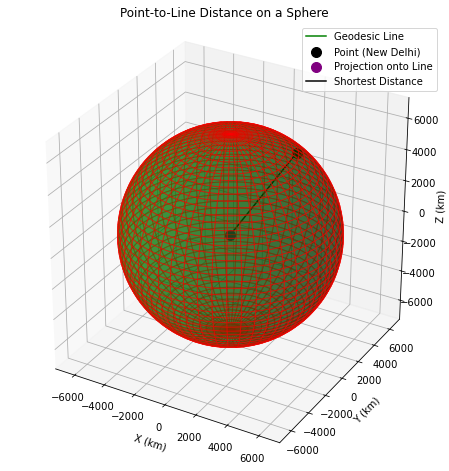

The shortest distance from the point to the line is: 199.62 km


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Earth's radius
EARTH_RADIUS = 6371  # in kilometers

# Convert lat/lon to Cartesian coordinates
def to_cartesian(lat, lon, radius=EARTH_RADIUS):
    """Convert latitude and longitude to Cartesian coordinates."""
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius * np.sin(lat_rad)
    return np.array([x, y, z])

# Shortest distance from point to line on a sphere
def point_to_line_distance(lat_p, lon_p, lat1, lon1, lat2, lon2, radius=EARTH_RADIUS):
    """Calculate the shortest distance from a point to a line on a sphere."""
    # Convert to Cartesian coordinates
    p = to_cartesian(lat_p, lon_p, radius)
    l1 = to_cartesian(lat1, lon1, radius)
    l2 = to_cartesian(lat2, lon2, radius)

    # Normalize to unit vectors
    p /= np.linalg.norm(p)
    l1 /= np.linalg.norm(l1)
    l2 /= np.linalg.norm(l2)

    # Compute the cross product of l1 and l2 (direction vector of great-circle plane)
    plane_normal = np.cross(l1, l2)
    plane_normal /= np.linalg.norm(plane_normal)

    # Project p onto the plane
    projection = p - np.dot(p, plane_normal) * plane_normal
    projection /= np.linalg.norm(projection)

    # Calculate angular distance between the projected point and the original point
    cos_angle = np.dot(p, projection)
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))  # Clip for numerical stability

    # Convert angular distance to linear distance
    distance = np.float64(radius * angle)  # Use np.float64 for the distance
    return distance

# Plot the sphere, points, and geodesic line
def plot_sphere_and_distance(lat_p, lon_p, lat1, lon1, lat2, lon2):
    """Plot a sphere, a geodesic line, and a point's shortest distance to the line."""
    # Create the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = EARTH_RADIUS * np.outer(np.cos(u), np.sin(v))
    y = EARTH_RADIUS * np.outer(np.sin(u), np.sin(v))
    z = EARTH_RADIUS * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot sphere
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='green', alpha=0.5, edgecolor='red')

    # Convert points to Cartesian coordinates
    p = to_cartesian(lat_p, lon_p)
    l1 = to_cartesian(lat1, lon1)
    l2 = to_cartesian(lat2, lon2)

    # Plot the geodesic line
    t = np.linspace(0, 1, 100)
    geodesic = np.array([(1 - ti) * l1 + ti * l2 for ti in t])
    geodesic /= np.linalg.norm(geodesic, axis=1)[:, None] * EARTH_RADIUS
    ax.plot(geodesic[:, 0], geodesic[:, 1], geodesic[:, 2], color='green', label='Geodesic Line')

    # Plot the point
    ax.scatter(*p, color='black', s=100, label='Point (New Delhi)')

    # Calculate and plot the projection
    plane_normal = np.cross(l1, l2)
    plane_normal /= np.linalg.norm(plane_normal)
    projection = p - np.dot(p, plane_normal) * plane_normal
    projection /= np.linalg.norm(projection) * EARTH_RADIUS
    ax.scatter(*projection, color='purple', s=100, label='Projection onto Line')

    # Plot connecting line
    ax.plot([p[0], projection[0]], [p[1], projection[1]], [p[2], projection[2]], color='black', label='Shortest Distance')

    # Add details to the plot
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Z (km)")
    ax.set_title("Point-to-Line Distance on a Sphere")
    ax.legend()
    plt.show()

# Example: New Delhi to London-Singapore geodesic line
lat_p, lon_p = 28.6139, 77.2090  # New Delhi
lat1, lon1 = 51.5074, -0.1278    # London
lat2, lon2 = 1.3521, 103.8198    # Singapore

# Calculate distance and plot
distance = point_to_line_distance(lat_p, lon_p, lat1, lon1, lat2, lon2)
plot_sphere_and_distance(lat_p, lon_p, lat1, lon1, lat2, lon2)

# Output the calculated distance
print(f"The shortest distance from the point to the line is: {distance:.2f} km")



This code provides a comprehensive implementation for calculating and visualizing the shortest distance from a point to a polygon on a sphere. It includes:

1. **to_cartesian**: Converts latitude and longitude into Cartesian coordinates for 3D calculations on the sphere.
2. **point_to_polygon_distance**: Computes the minimum distance from a point to the edges of a spherical polygon using great-circle geometry, useful for hazard zone identification or buffer analysis.
3. **point_to_line_distance**: Calculates the shortest distance from a point to a geodesic line segment, which can be used for analyzing proximity to linear features like roads or fault lines.
4. **plot_sphere_and_polygon**: Plots a 3D representation of a sphere, a point, a polygon, and the shortest distance between them, aiding in spatial risk assessment and visualization.

The example demonstrates the functionality with a triangular polygon over the Pacific Ocean and a nearby point, making it suitable for geospatial analysis, hazard zone identification, buffer calculations, or geographic visualization tasks.



The shortest distance from the point to the polygon is: 33.79 km


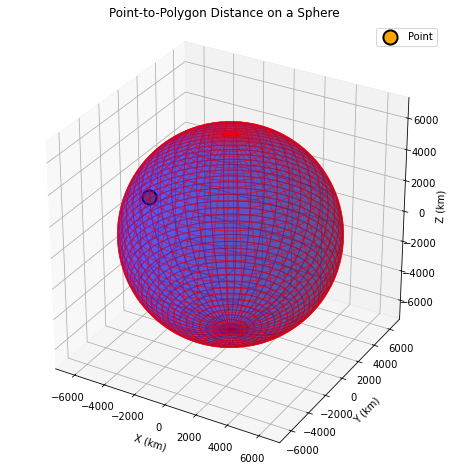

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Earth's radius
EARTH_RADIUS = 6371  # in kilometers

# Convert lat/lon to Cartesian coordinates
def to_cartesian(lat, lon, radius=EARTH_RADIUS):
    """Convert latitude and longitude to Cartesian coordinates."""
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius * np.sin(lat_rad)
    return np.array([x, y, z])

# Calculate the shortest distance from a point to a polygon on a sphere
def point_to_polygon_distance(lat_p, lon_p, polygon_coords, radius=EARTH_RADIUS):
    """Calculate the shortest distance from a point to the nearest boundary of a polygon on a sphere."""
    # Convert the point to Cartesian coordinates
    p = to_cartesian(lat_p, lon_p, radius)
    
    # Initialize the minimum distance as a large value
    min_distance = float('inf')
    
    # Iterate over each edge of the polygon (pairs of consecutive points)
    for i in range(len(polygon_coords)):
        lat1, lon1 = polygon_coords[i]
        lat2, lon2 = polygon_coords[(i + 1) % len(polygon_coords)]  # Wrap around to the first point
        
        # Convert polygon points to Cartesian coordinates
        p1 = to_cartesian(lat1, lon1, radius)
        p2 = to_cartesian(lat2, lon2, radius)
        
        # Compute the shortest distance from the point to the edge (line segment)
        dist = point_to_line_distance(lat_p, lon_p, lat1, lon1, lat2, lon2, radius)
        
        # Update the minimum distance
        min_distance = min(min_distance, dist)
    
    return np.float64(min_distance)

# Compute the shortest distance from a point to a line (great-circle segment)
def point_to_line_distance(lat_p, lon_p, lat1, lon1, lat2, lon2, radius=EARTH_RADIUS):
    """Compute the shortest distance from a point to a line segment on the sphere."""
    # Convert points to Cartesian coordinates
    p = to_cartesian(lat_p, lon_p, radius)
    l1 = to_cartesian(lat1, lon1, radius)
    l2 = to_cartesian(lat2, lon2, radius)

    # Normalize to unit vectors
    p /= np.linalg.norm(p)
    l1 /= np.linalg.norm(l1)
    l2 /= np.linalg.norm(l2)

    # Compute the cross product of l1 and l2 (direction vector of great-circle plane)
    plane_normal = np.cross(l1, l2)
    plane_normal /= np.linalg.norm(plane_normal)

    # Project p onto the plane
    projection = p - np.dot(p, plane_normal) * plane_normal
    projection /= np.linalg.norm(projection)

    # Calculate angular distance between the projected point and the original point
    cos_angle = np.dot(p, projection)
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))  # Clip for numerical stability

    # Convert angular distance to linear distance
    distance = np.float64(radius * angle)  # Use np.float64 for the distance
    return distance

# Plot the sphere, point, polygon, and shortest distance
def plot_sphere_and_polygon(lat_p, lon_p, polygon_coords):
    """Plot a sphere with a point and a polygon on it, and the shortest distance from the point to the polygon."""
    # Create the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = EARTH_RADIUS * np.outer(np.cos(u), np.sin(v))
    y = EARTH_RADIUS * np.outer(np.sin(u), np.sin(v))
    z = EARTH_RADIUS * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot sphere with some transparency and a nice color
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='blue', alpha=0.4, edgecolor='red')

    # Convert the point and polygon vertices to Cartesian coordinates
    p = to_cartesian(lat_p, lon_p)
    polygon_cartesian = [to_cartesian(lat, lon) for lat, lon in polygon_coords]

    # Plot the point with larger size and distinct color
    ax.scatter(*p, color='orange', s=200, label='Point', marker='o', edgecolor='black', linewidth=2)

    # Plot the polygon edges
    for i in range(len(polygon_cartesian)):
        p1 = polygon_cartesian[i]
        p2 = polygon_cartesian[(i + 1) % len(polygon_cartesian)]  # Wrap around to the first point
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color='green', lw=2)

    # Calculate and plot the shortest distance from the point to the polygon
    distance = point_to_polygon_distance(lat_p, lon_p, polygon_coords)
    print(f"The shortest distance from the point to the polygon is: {distance:.2f} km")
    
    # Add labels, title, and legend
    ax.set_box_aspect([1, 1, 1])  # Equal scaling for all axes
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Z (km)")
    ax.set_title("Point-to-Polygon Distance on a Sphere")
    ax.legend()

    # Show plot
    plt.show()

# Define an example polygon (a simple triangle) and a point
polygon_coords = [(35.0, -120.0), (37.0, -122.0), (36.0, -123.0)]  # Triangle in the Pacific Ocean
lat_p, lon_p = 36.5, -121.0  # A point near the triangle

# Plot the sphere with the point and polygon
plot_sphere_and_polygon(lat_p, lon_p, polygon_coords)



This code provides a method for calculating and visualizing the midpoint between two points on a sphere (Earth). It includes:

1. **to_cartesian**: Converts latitude and longitude into Cartesian coordinates for 3D space.
2. **midpoint**: Computes the midpoint between two geographic points on the sphere, representing the point that is equidistant from both. This is useful in route planning and navigation, as it can help determine a central point for optimal travel.
3. **plot_sphere_with_midpoint**: Plots a 3D representation of the sphere, the two points, and their midpoint, helping visualize their spatial relationship.

The example demonstrates the functionality with New York City and Los Angeles, showing how to find and visualize the midpoint between two locations on Earth. This can be applied in various geospatial tasks, including routing, travel planning, and geographic analysis.



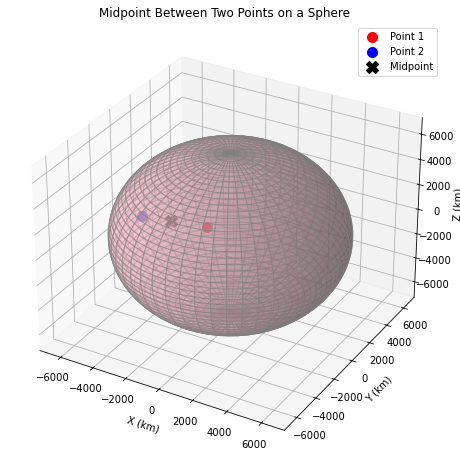

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Earth's radius in kilometers
EARTH_RADIUS = 6371  

def to_cartesian(lat, lon, radius=EARTH_RADIUS):
    """
    Convert latitude and longitude to Cartesian coordinates.
    """
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius * np.sin(lat_rad)
    return np.array([x, y, z])

def midpoint(lat1, lon1, lat2, lon2, radius=EARTH_RADIUS):
    """
    Calculate the Cartesian midpoint between two geographic points on a sphere.
    """
    p1 = to_cartesian(lat1, lon1, radius)
    p2 = to_cartesian(lat2, lon2, radius)
    midpoint_cartesian = (p1 + p2) / np.linalg.norm(p1 + p2)  # Normalize to unit vector
    return midpoint_cartesian * radius  # Scale to sphere's radius

def plot_sphere_with_midpoint(lat1, lon1, lat2, lon2):
    """
    Plot a sphere with two points and their midpoint.
    """
    # Create the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = EARTH_RADIUS * np.outer(np.cos(u), np.sin(v))
    y = EARTH_RADIUS * np.outer(np.sin(u), np.sin(v))
    z = EARTH_RADIUS * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the sphere
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='pink', alpha=0.5, edgecolor='grey')

    # Compute Cartesian coordinates for the points
    p1 = to_cartesian(lat1, lon1)
    p2 = to_cartesian(lat2, lon2)
    midpoint_cartesian = midpoint(lat1, lon1, lat2, lon2)

    # Plot points and midpoint
    ax.scatter(*p1, color='red', s=100, label="Point 1", marker='o')
    ax.scatter(*p2, color='blue', s=100, label="Point 2", marker='o')
    ax.scatter(*midpoint_cartesian, color='black', s=150, label="Midpoint", marker='X')

    # Add labels, legend, and title
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Z (km)")
    ax.set_title("Midpoint Between Two Points on a Sphere")
    ax.legend()

    plt.show()

# Example usage: New York City and Los Angeles
if __name__ == "__main__":
    lat1, lon1 = 40.7128, -74.0060  # New York City
    lat2, lon2 = 34.0522, -118.2437  # Los Angeles
    plot_sphere_with_midpoint(lat1, lon1, lat2, lon2)



This code provides a comprehensive implementation for calculating and visualizing geodetic and Euclidean distances between two geographic points on the Earth's surface. It includes:

1. **geodetic_distance**: Calculates the geodetic distance between two points using the Haversine formula, which accounts for the Earth's curvature.
2. **euclidean_distance**: Computes the Euclidean distance between two points in 3D space, assuming a spherical Earth model. This is useful for spatial analysis in geodesy and navigation.
3. **spherical_to_cartesian**: Converts latitude and longitude coordinates into Cartesian (x, y, z) coordinates for 3D calculations and visualization.
4. **plot_distances**: Visualizes the geodetic distance, Euclidean distance, and the great-circle path (shortest path on the surface of the sphere) between two points on a 3D plot of the Earth.
5. **great_circle_path**: Computes the great-circle path between two points on the sphere for visualizing the shortest route along the Earth's surface.

The example demonstrates the functionality with New York City and Los Angeles, calculating both the geodetic and Euclidean distances and visualizing the paths. This can be applied to routing, navigation, spatial analysis, and geospatial visualization tasks.


Geodetic Distance: 3937.22 km
Euclidean Distance: 3874.86 km


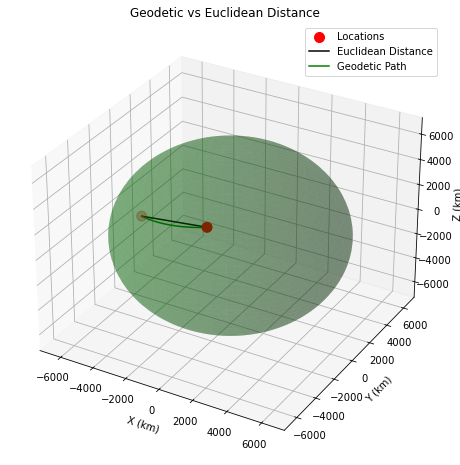

In [7]:
# Import necessary libraries
import numpy as np
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate geodetic distance using the haversine formula
def geodetic_distance(lat1, lon1, lat2, lon2, radius=6371):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return radius * c

# Function to calculate Euclidean distance in 3D space
def euclidean_distance(lat1, lon1, lat2, lon2, radius=6371):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    x1, y1, z1 = spherical_to_cartesian(lat1, lon1, radius)
    x2, y2, z2 = spherical_to_cartesian(lat2, lon2, radius)
    return sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Helper function to convert spherical coordinates to Cartesian
def spherical_to_cartesian(lat, lon, radius):
    x = radius * cos(lat) * cos(lon)
    y = radius * cos(lat) * sin(lon)
    z = radius * sin(lat)
    return x, y, z

# Visualization
def plot_distances(lat1, lon1, lat2, lon2, radius=6371):
    # Convert points to Cartesian coordinates
    x1, y1, z1 = spherical_to_cartesian(radians(lat1), radians(lon1), radius)
    x2, y2, z2 = spherical_to_cartesian(radians(lat2), radians(lon2), radius)
    
    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the sphere (Earth)
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
    xs = radius * np.cos(u) * np.sin(v)
    ys = radius * np.sin(u) * np.sin(v)
    zs = radius * np.cos(v)
    ax.plot_surface(xs, ys, zs, color='darkgreen', alpha=0.3)
    
    # Plot the two points
    ax.scatter([x1, x2], [y1, y2], [z1, z2], color='red', s=100, label='Locations')
    
    # Plot geodetic distance as an arc
    ax.plot([x1, x2], [y1, y2], [z1, z2], label='Euclidean Distance', color='black')
    
    # Add the geodetic path (great circle)
    geodesic_path = great_circle_path(lat1, lon1, lat2, lon2, radius)
    ax.plot(geodesic_path[:, 0], geodesic_path[:, 1], geodesic_path[:, 2], label='Geodetic Path', color='green')
    
    # Add labels
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    ax.set_zlabel("Z (km)")
    ax.set_title("Geodetic vs Euclidean Distance")
    ax.legend()
    plt.show()

# Helper function to compute the great circle path
def great_circle_path(lat1, lon1, lat2, lon2, radius, points=100):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    lats = np.linspace(lat1, lat2, points)
    lons = np.linspace(lon1, lon2, points)
    path = np.array([spherical_to_cartesian(lat, lon, radius) for lat, lon in zip(lats, lons)])
    return path

# Example usage
if __name__ == "__main__":
    # Coordinates of two points (latitude, longitude in degrees)
    point1 = (40.748817, -73.985428)  # New York (Empire State Building)
    point2 = (34.052235, -118.243683)  # Los Angeles (Downtown)

    # Calculate distances
    geo_dist = geodetic_distance(*point1, *point2)
    euc_dist = euclidean_distance(*point1, *point2)
    
    # Print results
    print(f"Geodetic Distance: {geo_dist:.2f} km")
    print(f"Euclidean Distance: {euc_dist:.2f} km")
    
    # Plot the distances
    plot_distances(*point1, *point2)



The script models a network of cities and computes the shortest route between two cities using Dijkstra's algorithm, leveraging geodesic distances. It encompasses the following components:

1. **to_cartesian**: Converts geographic coordinates (latitude and longitude) to Cartesian coordinates (x, y, z) for accurate distance calculations on the Earth's surface.
2. **haversine_distance**: Applies the Haversine formula to calculate the great-circle distance between two points on a sphere, which serves as the edge weight in the graph.
3. **dijkstra**: Implements Dijkstra's algorithm to determine the shortest path between two cities, considering geodesic distances as the graph's edge weights.
4. **create_network**: Constructs a graph where each city is connected to others, with edges weighted by the geodesic distances between them, calculated using the Haversine formula.
5. **plot_network**: Visualizes the cities and their network on a 2D map, with the shortest path displayed in red to provide a clear representation of the route.

The example uses a selection of cities, including New York, Los Angeles, London, Paris, and Tokyo. It calculates and visualizes the shortest path between New York and Paris, demonstrating the utility of this approach for routing, navigation, and spatial analysis tasks.



Shortest path from (40.7128, -74.006) to (48.8566, 2.3522):
Path: [(40.7128, -74.006), (48.8566, 2.3522)]
Distance: 5837.24 km


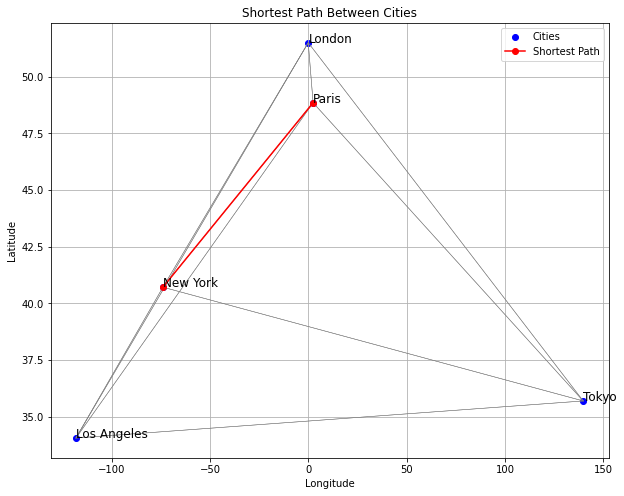

In [8]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Constants for Earth's radius
EARTH_RADIUS = 6371  # in kilometers

# Convert lat/lon to Cartesian coordinates
def to_cartesian(lat, lon, radius=EARTH_RADIUS):
    """Convert latitude and longitude to Cartesian coordinates."""
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius * np.sin(lat_rad)
    return np.array([x, y, z])

# Haversine formula to calculate the great-circle distance between two points
def haversine_distance(p1, p2):
    """Calculate the great-circle distance between two points on a sphere."""
    R = EARTH_RADIUS
    dlat = np.radians(p2[0] - p1[0])
    dlon = np.radians(p2[1] - p1[1])

    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(p1[0])) * np.cos(np.radians(p2[0])) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Dijkstra's algorithm to find the shortest path in a graph
def dijkstra(graph, start, goal):
    """Find the shortest path in a weighted graph using Dijkstra's algorithm."""
    queue = [(0, start)]  # (distance, node)
    distances = {start: 0}
    previous_nodes = {start: None}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node == goal:
            # Reconstruct the path
            path = []
            while previous_nodes[current_node] is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            path.reverse()
            return path, distances[goal]

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if neighbor not in distances or distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return None, float("inf")  # No path found

# Create a network of cities with geodesic distances as weights
def create_network(cities):
    """Create a network (graph) where each city is connected to others with geodesic distances."""
    graph = {city: {} for city in cities}

    for i, city1 in enumerate(cities):
        for j, city2 in enumerate(cities):
            if i != j:
                lat1, lon1 = city1
                lat2, lon2 = city2
                p1 = to_cartesian(lat1, lon1)
                p2 = to_cartesian(lat2, lon2)
                distance = haversine_distance((lat1, lon1), (lat2, lon2))
                graph[city1][city2] = distance
                graph[city2][city1] = distance

    return graph

# Visualize the network (graph) on a 2D map (for simplicity)
def plot_network(cities, path=None, graph=None):
    """Plot the cities and the path in the network, along with city names and network edges."""
    latitudes, longitudes = zip(*cities)
    city_names = ['New York', 'Los Angeles', 'London', 'Paris', 'Tokyo']

    plt.figure(figsize=(10, 8))

    # Plot all cities as points
    plt.scatter(longitudes, latitudes, color='blue', label='Cities')

    # Label each city with its name
    for i, city in enumerate(cities):
        plt.text(longitudes[i] + 0.1, latitudes[i], city_names[i], fontsize=12)

    # Plot the network (edges) between cities
    if graph:
        for city1, neighbors in graph.items():
            lat1, lon1 = city1
            for city2, dist in neighbors.items():
                lat2, lon2 = city2
                plt.plot([lon1, lon2], [lat1, lat2], color='gray', linestyle='-', linewidth=0.5)

    if path:
        # Plot the path in red
        path_lats, path_lons = zip(*path)
        plt.plot(path_lons, path_lats, color='red', marker='o', label="Shortest Path")

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Shortest Path Between Cities')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example cities (latitude, longitude)
cities = [
    (40.7128, -74.0060),  # New York City
    (34.0522, -118.2437),  # Los Angeles
    (51.5074, -0.1278),    # London
    (48.8566, 2.3522),     # Paris
    (35.6895, 139.6917),   # Tokyo
]

# Create the network (graph) with geodesic distances
graph = create_network(cities)

# Choose a start and goal city
start_city = (40.7128, -74.0060)  # New York City
goal_city = (48.8566, 2.3522)     # Paris

# Find the shortest path using Dijkstra's algorithm
path, distance = dijkstra(graph, start_city, goal_city)

# Output the shortest path and its distance
print(f"Shortest path from {start_city} to {goal_city}:")
print(f"Path: {path}")
print(f"Distance: {distance:.2f} km")

# Plot the network and the path
plot_network(cities, path=path, graph=graph)



This script computes and visualizes the waypoints along a great-circle route between two geographic locations. It includes the following functions:

1. **to_cartesian**: Converts geographic coordinates (latitude and longitude) to Cartesian coordinates (x, y, z) for precise spatial calculations on the Earth's surface.
2. **haversine_distance**: Computes the great-circle distance between two points on the sphere using the Haversine formula, essential for route distance calculations.
3. **interpolate_waypoints**: Generates intermediate waypoints along the great-circle path by linearly interpolating between two points on the sphere's surface.
4. **total_travel_distance**: Calculates the total distance traveled along the series of waypoints by summing the distances between consecutive waypoints.
5. **plot_waypoints**: Visualizes the start and end points, along with the interpolated waypoints and the route connecting them, on a 2D map.

The example demonstrates a route between New York and Paris, calculating and plotting the waypoints along the great-circle path, and outputs the total travel distance for the curved route.

---

### **Real-World Applications:**

This script can be used in various real-world applications such as migration path tracking, navigation, environmental studies, and disaster management. For example, it can help optimize flight routes, track animal migration patterns, or model the spread of environmental phenomena like wildfires. It can also be utilized for logistics and humanitarian aid distribution by identifying the most efficient routes for transportation across global regions. Additionally, the algorithm can be extended to accommodate multiple stops, dynamic routing, or real-time adjustments, making it suitable for more complex applications like multi-leg journeys and optimized travel planning.


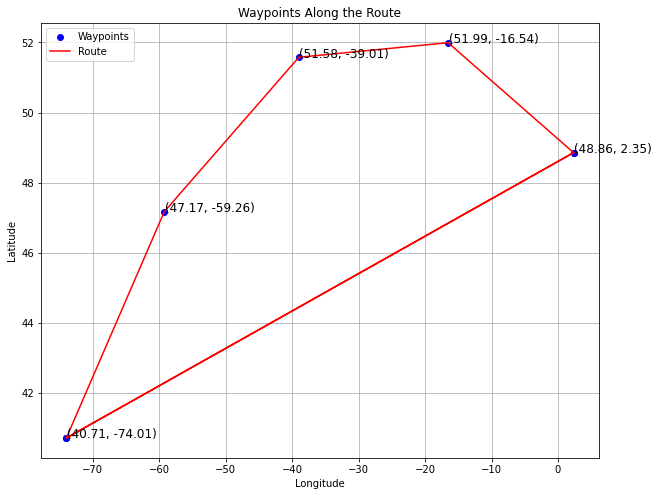

Total travel distance along the curved path: 5837.24 km


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Earth's radius
EARTH_RADIUS = 6371  # in kilometers

# Convert lat/lon to Cartesian coordinates
def to_cartesian(lat, lon, radius=EARTH_RADIUS):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = radius * np.cos(lat_rad) * np.sin(lon_rad)
    z = radius * np.sin(lat_rad)
    return np.array([x, y, z])

# Great-circle distance between two points (Haversine formula)
def haversine_distance(p1, p2):
    R = EARTH_RADIUS
    dlat = np.radians(p2[0] - p1[0])
    dlon = np.radians(p2[1] - p1[1])

    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(p1[0])) * np.cos(np.radians(p2[0])) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Interpolate waypoints along the great-circle arc
def interpolate_waypoints(start, end, num_points=5):
    start_cartesian = to_cartesian(*start)
    end_cartesian = to_cartesian(*end)

    # Normalize vectors to unit sphere
    start_cartesian /= np.linalg.norm(start_cartesian)
    end_cartesian /= np.linalg.norm(end_cartesian)

    # Interpolate points along the great-circle path
    waypoints = []
    for i in range(num_points):
        t = i / (num_points - 1)
        point = (1 - t) * start_cartesian + t * end_cartesian
        point /= np.linalg.norm(point)  # Normalize to unit sphere
        lat = np.degrees(np.arcsin(point[2]))  # Convert to lat/lon
        lon = np.degrees(np.arctan2(point[1], point[0]))
        waypoints.append((lat, lon))

    return waypoints

# Function to compute the distance along a series of waypoints
def total_travel_distance(waypoints):
    total_distance = 0
    for i in range(1, len(waypoints)):
        total_distance += haversine_distance(waypoints[i-1], waypoints[i])
    return total_distance

# Plot the waypoints along the route
def plot_waypoints(start, end, waypoints):
    latitudes, longitudes = zip(start, end)
    latitudes = np.append(latitudes, [wp[0] for wp in waypoints])
    longitudes = np.append(longitudes, [wp[1] for wp in waypoints])

    # Plot the great-circle path
    plt.figure(figsize=(10, 8))
    plt.scatter(longitudes, latitudes, color='blue', label="Waypoints")
    for wp in waypoints:
        plt.text(wp[1] + 0.1, wp[0], f"({wp[0]:.2f}, {wp[1]:.2f})", fontsize=12)
    plt.plot(longitudes, latitudes, color='red', label="Route")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Waypoints Along the Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Waypoints between New York and Paris
start = (40.7128, -74.0060)  # New York City (lat, lon)
end = (48.8566, 2.3522)     # Paris (lat, lon)

# Calculate intermediate waypoints
waypoints = interpolate_waypoints(start, end, num_points=5)

# Plot the waypoints and the route
plot_waypoints(start, end, waypoints)

# Calculate the total travel distance along the route
waypoints_for_route = [start] + waypoints + [end]
total_distance = total_travel_distance(waypoints_for_route)

# Output the total distance
print(f"Total travel distance along the curved path: {total_distance:.2f} km")



This script generates a heatmap visualizing the distances from New York City to various points on the globe using the Haversine formula. It also overlays geographic boundaries and country outlines. The script includes the following key functions:

1. **haversine**: Computes the great-circle distance between two geographic points using the Haversine formula, which is essential for measuring distances on the Earth's curved surface.
2. **Create grid**: A grid of latitude and longitude points is generated to represent locations across the globe.
3. **Distance calculation**: For each point on the grid, the script calculates the distance from the specified origin (New York City) using the Haversine formula.
4. **Normalization**: The distance values are normalized to enhance the visualization, focusing on the distribution of distances.
5. **Plot the heatmap**: Using Cartopy, the script visualizes the distances in a heatmap format. It employs color intensities to represent varying distances from New York City, with warmer colors indicating shorter distances.
6. **Shapefile overlays**: The script adds geographic features, such as country boundaries and land borders, onto the map using shapefiles.
7. **Colorbar and title**: A colorbar is added to represent distance, and the plot is given a title for context.

The heatmap provides a clear visual representation of how distance from New York City varies across the globe, and the shapefile overlays help contextualize the heatmap in terms of geographic boundaries.

---

### **Real-World Applications:**

This script can be applied in several real-world scenarios, including:

1. **Logistics and Delivery Optimization**: It can be used to visualize distances from a central hub (like a distribution center) to various regions, helping in route planning and delivery time estimation.

2. **Geospatial Analysis**: Environmental scientists can leverage this for studying geographical patterns, such as climate change impacts or migration patterns, by visualizing proximity to specific locations.

By utilizing the Haversine formula to calculate distances and Cartopy for visualization, this script can be a powerful tool for applications requiring global spatial analysis.


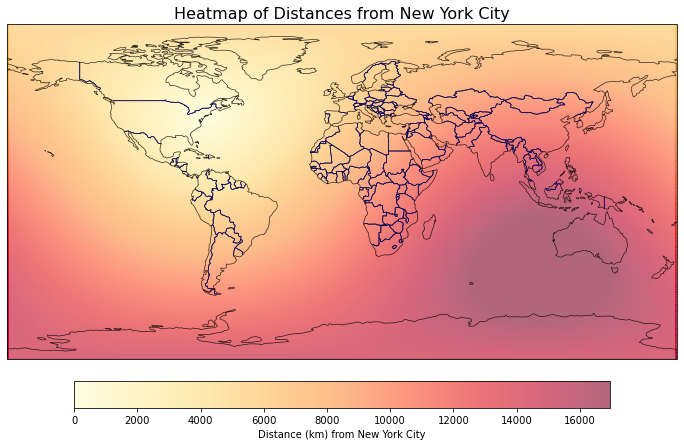

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.colors import Normalize

# Replace these paths with the actual paths to your shapefiles
shapefile_countries = "/Users/ghulamabbaszafari/Downloads/packages/Natural_Earth_quick_start/110m_cultural/ne_110m_admin_0_countries.shp"
shapefile_boundaries = "/Users/ghulamabbaszafari/Downloads/packages/Natural_Earth_quick_start/110m_cultural/ne_110m_admin_0_boundary_lines_land.shp"

# Heatmap parameters
EARTH_RADIUS = 6371  # Earth's radius in km
origin = (40.7128, -74.0060)  # New York City coordinates

# Function to compute haversine distance
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return EARTH_RADIUS * c

# Create a grid for the heatmap
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Calculate distances from the origin to each point in the grid
distances = haversine(origin[0], origin[1], lat_grid, lon_grid)

# Normalize distances for better visualization
norm = Normalize(vmin=0, vmax=np.percentile(distances, 95))

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Plot the heatmap
heatmap = ax.pcolormesh(lon, lat, distances, transform=ccrs.PlateCarree(),
                        cmap='YlOrRd', norm=norm, alpha=0.6)

# Add the manually loaded shapefiles
reader_countries = shpreader.Reader(shapefile_countries)
countries_feature = cfeature.ShapelyFeature(reader_countries.geometries(), ccrs.PlateCarree())

reader_boundaries = shpreader.Reader(shapefile_boundaries)
boundaries_feature = cfeature.ShapelyFeature(reader_boundaries.geometries(), ccrs.PlateCarree())

# Plot the shapefiles
ax.add_feature(countries_feature, facecolor='none', edgecolor='black', linewidth=0.7, alpha=0.8)
ax.add_feature(boundaries_feature, facecolor='none', edgecolor='blue', linewidth=0.5, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('Distance (km) from New York City')

# Add title
ax.set_title('Heatmap of Distances from New York City', fontsize=16)

plt.show()


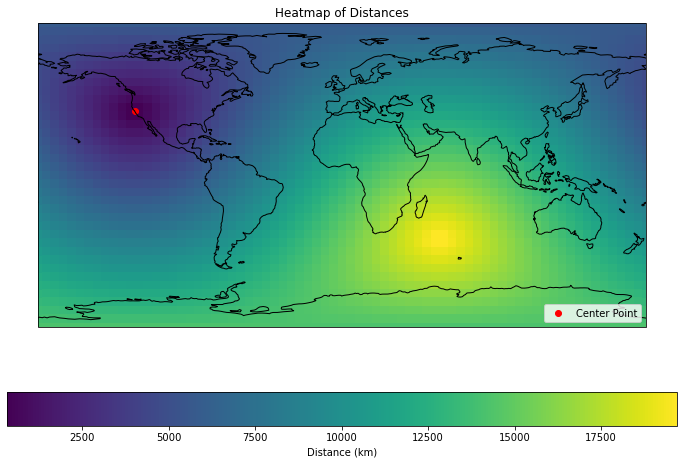

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from math import radians, sin, cos, sqrt, atan2

# Function to calculate geodetic distance using the haversine formula
def haversine(lat1, lon1, lat2, lon2, radius=6371):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return radius * c

# Function to generate a heatmap of distances
def generate_distance_heatmap(center_lat, center_lon, grid_resolution=5.0, radius=6371):
    """
    Generate a heatmap of distances from a central point.

    Args:
    center_lat, center_lon: Latitude and Longitude of the center point in degrees
    grid_resolution: Resolution of the grid in degrees (default: 5.0 degrees)
    radius: Radius of the Earth in kilometers (default: 6371 km)

    Returns:
    lats, lons: 2D arrays of latitude and longitude grid points
    distances: 2D array of distances from the center point
    """
    # Create a latitude and longitude grid (adjusted resolution)
    lats = np.arange(-90, 90 + grid_resolution, grid_resolution)
    lons = np.arange(-180, 180 + grid_resolution, grid_resolution)
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Calculate distances from the center point
    distances = np.vectorize(haversine)(center_lat, center_lon, lat_grid, lon_grid, radius)

    return lat_grid, lon_grid, distances

# Function to plot the heatmap
def plot_heatmap(lat_grid, lon_grid, distances, center_lat, center_lon):
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    ax.stock_img()

    # Plot the heatmap
    heatmap = ax.pcolormesh(
        lon_grid,
        lat_grid,
        distances,
        transform=ccrs.PlateCarree(),
        cmap="viridis",
        shading="nearest",  # Changed from "auto" to "nearest"
    )
    plt.colorbar(heatmap, ax=ax, orientation='horizontal', label="Distance (km)")

    # Mark the center point
    ax.scatter(center_lon, center_lat, color='red', transform=ccrs.PlateCarree(), label='Center Point')

    # Add a legend with fixed location
    plt.legend(loc="lower right")
    plt.title("Heatmap of Distances")
    plt.show()

# Example usage
center_lat = 37.7749  # San Francisco latitude
center_lon = -122.4194  # San Francisco longitude
lat_grid, lon_grid, distances = generate_distance_heatmap(center_lat, center_lon, grid_resolution=5.0)
plot_heatmap(lat_grid, lon_grid, distances, center_lat, center_lon)



This script calculates and visualizes great-circle arcs between pairs of cities on a flat map using Cartopy. It includes the following key functions:

1. **great_circle_arc**: Calculates the points along a great-circle arc between two geographical coordinates (latitude and longitude). This is done by interpolating points along the arc using spherical trigonometry.
2. **Cities Coordinates**: Defines the coordinates of multiple cities, representing them as a dictionary of city names and their corresponding latitude and longitude values.
3. **Map Visualization**: Uses Cartopy to create a flat map (Mercator projection), plotting the great-circle arcs between selected pairs of cities. Cities are marked as points on the map, and arcs are drawn in red.
4. **Map Features**: Adds essential geographic features to the map, such as landmasses, coastlines, and country borders, for context and better visualization.
5. **Title and Legend**: Adds a title to the map and a legend to label the arcs between cities.

The example demonstrates great-circle arcs between cities like New York, Paris, Tokyo, Sydney, and Los Angeles, visualized on a flat map projection. The script provides insight into how great-circle routes differ from straight-line distances, helping to visualize the curvature of the Earth.

---

### **Real-World Applications:**

This script can be applied in various fields:

1. **Aviation Route Planning**: Airlines can use this to visualize the shortest flight paths between airports, which are often great-circle routes.
2. **Shipping and Logistics**: Shipping companies can optimize routes by visualizing the most efficient paths across the globe.
3. **Geospatial Data Visualization**: Researchers and geographers can use this tool to illustrate global connections and the impact of geographic distance on various phenomena, such as climate change or disease spread.
4. **Tourism and Travel**: Travel agencies or travelers could use this to visualize the most efficient routes between tourist destinations.
5. **Global Network Optimization**: Companies managing global networks (e.g., telecommunications, internet infrastructure) can use this to optimize the layout of their global connections.

By visualizing great-circle arcs, this script offers a clear representation of Earth's spherical geometry and the shortest distance between distant locations.



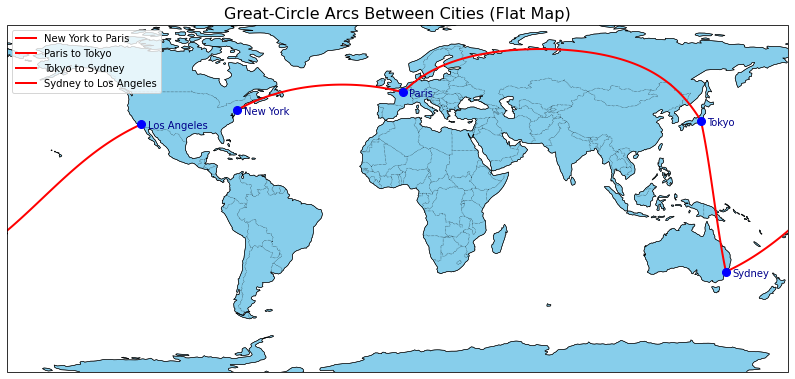

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Great-circle calculation function
def great_circle_arc(lat1, lon1, lat2, lon2, num_points=100):
    """
    Calculate points along the great-circle arc between two geographical coordinates.
    Returns arrays of latitude and longitude points along the arc.
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Interpolate the great circle
    t = np.linspace(0, 1, num_points)
    d = 2 * np.arcsin(np.sqrt(np.sin((lat2 - lat1) / 2)**2 + 
                              np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1) / 2)**2))
    A = np.sin((1 - t) * d) / np.sin(d)
    B = np.sin(t * d) / np.sin(d)

    x = A * np.cos(lat1) * np.cos(lon1) + B * np.cos(lat2) * np.cos(lon2)
    y = A * np.cos(lat1) * np.sin(lon1) + B * np.cos(lat2) * np.sin(lon2)
    z = A * np.sin(lat1) + B * np.sin(lat2)

    latitudes = np.arctan2(z, np.sqrt(x**2 + y**2))
    longitudes = np.arctan2(y, x)
    return np.degrees(latitudes), np.degrees(longitudes)

# Coordinates of example cities
cities = {
    "New York": (40.7128, -74.0060),
    "Paris": (48.8566, 2.3522),
    "Tokyo": (35.6895, 139.6917),
    "Sydney": (-33.8688, 151.2093),
    "Los Angeles": (34.0522, -118.2437),
}

# Flat map with Mercator projection
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent (lat/lon bounds) explicitly for global coverage
ax.set_extent([-180, 180, -80, 80], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='skyblue', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', linewidth=0.5)

# Plot great-circle arcs between cities
pairs = [("New York", "Paris"), ("Paris", "Tokyo"), ("Tokyo", "Sydney"), ("Sydney", "Los Angeles")]
for city1, city2 in pairs:
    lat1, lon1 = cities[city1]
    lat2, lon2 = cities[city2]

    # Calculate the arc points
    arc_lat, arc_lon = great_circle_arc(lat1, lon1, lat2, lon2)
    ax.plot(arc_lon, arc_lat, transform=ccrs.Geodetic(), color='red', linewidth=2, label=f"{city1} to {city2}")

# Plot city points
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='blue', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 3, lat - 2, city, transform=ccrs.PlateCarree(), fontsize=10, color='darkblue')

# Add a title and legend
ax.set_title('Great-Circle Arcs Between Cities (Flat Map)', fontsize=16)
plt.legend(loc='upper left', fontsize=10, frameon=True)
plt.show()



This script calculates and visualizes the great-circle travel times between major cities across the globe using Cartopy. It includes the following key components:

1. **haversine_distance**: A function that calculates the great-circle distance between two geographic points (latitude and longitude) using the Haversine formula. The result is returned in kilometers, representing the shortest distance between the points on the Earth's surface.
2. **Travel Data Calculation**: A dictionary of city coordinates is defined, and the distances and travel times between specified pairs of cities are calculated using the `haversine_distance` function. Travel time is computed by dividing the distance by the average flight speed (900 km/h).
3. **Map Visualization**: Cartopy is used to plot the cities and the great-circle routes between them on a map. The cities are marked as blue dots, and the great-circle arcs (flight paths) are drawn in red with dashed lines.
4. **Travel Time Annotation**: The travel times for each flight route are annotated at the midpoint of each great-circle arc, providing the estimated duration for the journey in hours.
5. **Map Features**: The map features include landmasses, coastlines, and country borders for geographic context.

The example demonstrates flight travel times between cities like New York, London, Dubai, Tokyo, and Sydney. The great-circle arcs and travel times between these cities are visualized, helping to understand the shortest flight paths and estimated travel durations.






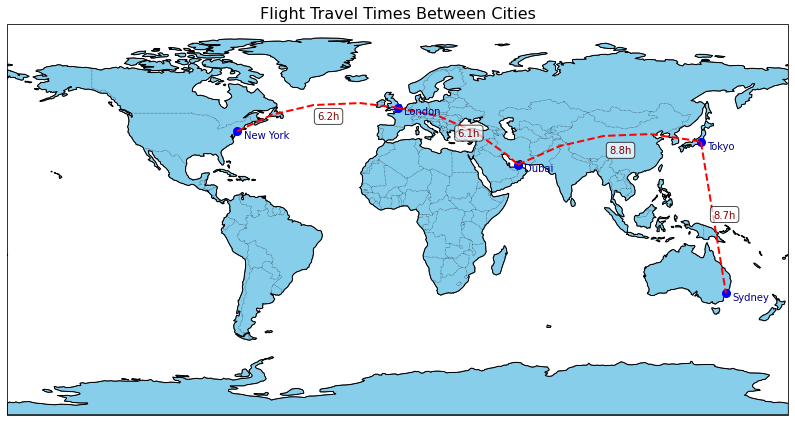

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Constants
EARTH_RADIUS = 6371  # in kilometers
FLIGHT_SPEED = 900  # Average commercial flight speed in km/h

# Function to calculate great-circle distance
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth (in km).
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return EARTH_RADIUS * c

# City coordinates
cities = {
    "New York": (40.7128, -74.0060),
    "London": (51.5074, -0.1278),
    "Tokyo": (35.6895, 139.6917),
    "Sydney": (-33.8688, 151.2093),
    "Dubai": (25.276987, 55.296249),
}

# Calculate distances and travel times between cities
travel_data = []
pairs = [("New York", "London"), ("London", "Dubai"), ("Dubai", "Tokyo"), ("Tokyo", "Sydney")]

for city1, city2 in pairs:
    lat1, lon1 = cities[city1]
    lat2, lon2 = cities[city2]
    distance = haversine_distance(lat1, lon1, lat2, lon2)
    travel_time = distance / FLIGHT_SPEED  # Time in hours
    travel_data.append((city1, city2, distance, travel_time))

# Plot map with connections and travel times
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, facecolor='skyblue', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black', linewidth=0.5)

# Plot cities and connections
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='blue', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 3, lat - 3, city, transform=ccrs.PlateCarree(), fontsize=10, color='darkblue')

for city1, city2, distance, travel_time in travel_data:
    lat1, lon1 = cities[city1]
    lat2, lon2 = cities[city2]

    # Draw great-circle arc
    ax.plot(
        [lon1, lon2], [lat1, lat2],
        transform=ccrs.Geodetic(),
        color='red', linestyle='--', linewidth=2
    )

    # Annotate travel time
    mid_lat = (lat1 + lat2) / 2
    mid_lon = (lon1 + lon2) / 2
    ax.text(
        mid_lon, mid_lat,
        f"{travel_time:.1f}h",
        transform=ccrs.Geodetic(),
        fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round')
    )

# Add title
ax.set_title('Flight Travel Times Between Cities', fontsize=16)
plt.show()



This script calculates and visualizes isochrones (areas reachable within a specified travel time) from a central location (New York City) on a map. It includes the following functions and components:

1. **haversine_distance**: A function that calculates the great-circle distance between two geographic points (latitude and longitude) using the Haversine formula. The result is returned in kilometers, representing the shortest distance between two points on the Earth's surface.
2. **Travel Time Calculation**: A grid of latitude and longitude points around the central location is generated. For each point, the Haversine formula is used to calculate the distance from the center, and the travel time is then computed based on a fixed travel speed (60 km/h).
3. **Isochrone Generation**: Using the travel times, isochrones (regions that can be reached within a given time threshold) are created. For each threshold (1, 2, and 3 hours), points within the respective time range are identified, and polygons are generated to approximate the reachable areas.
4. **Geospatial Visualization**: The isochrones are plotted using GeoPandas and Cartopy on a map. The regions corresponding to different time thresholds are colored differently (green, orange, red). The central location (New York City) is marked, and a custom legend is added to the map.
5. **Map Features**: The map includes landmasses, coastlines, and borders for geographic context, making it easy to visualize the isochrone regions in relation to the actual geography.

The result is a visualization showing the areas that can be reached from New York City within 1, 2, and 3 hours of travel. The isochrones help to understand the spatial extent of reachable areas based on travel time.

---

### **Real-World Applications:**

This script can be used in various practical scenarios:

1. **Urban Planning**: Planners can use isochrones to visualize the areas within certain travel times from a central location, helping to design transportation networks, assess accessibility to services, and plan infrastructure.
2. **Emergency Response**: Emergency services can use isochrones to determine areas that can be reached within a specific time frame, optimizing response times and coverage areas.
3. **Transportation and Logistics**: Businesses in logistics or transportation can model the reach of delivery or transport services based on travel times, helping to plan routes and optimize service areas.
4. **Tourism and Services**: Tourism agencies or service providers can visualize accessible areas for customers within certain travel times, helping to target specific regions for promotional activities.
5. **Market Analysis**: Companies can analyze market reach by calculating the isochrones around their physical stores or offices, determining the potential customer base within a given travel time.

By visualizing the regions reachable from a central location within different travel times, this tool aids in making informed decisions related to urban infrastructure, logistics, and accessibility.



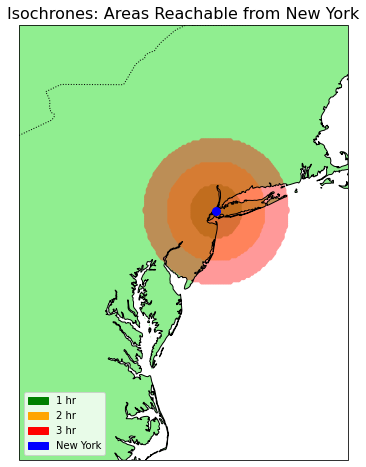

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
from shapely.ops import unary_union
import geopandas as gpd
from matplotlib.patches import Patch

# Constants
EARTH_RADIUS = 6371  # in kilometers
TRAVEL_SPEED = 60  # Speed in km/h (assumed constant)
TIME_THRESHOLDS = [1, 2, 3]  # Travel time thresholds in hours

# Function to calculate haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth (in km).
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return EARTH_RADIUS * c

# Central location (New York City)
center_lat, center_lon = 40.7128, -74.0060

# Generate grid points
lats = np.linspace(center_lat - 5, center_lat + 5, 200)
lons = np.linspace(center_lon - 5, center_lon + 5, 200)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Calculate distances and travel times for each point in the grid
distances = haversine_distance(center_lat, center_lon, lat_grid, lon_grid)
travel_times = distances / TRAVEL_SPEED  # Time in hours

# Create polygons for isochrones
isochrones = []
for threshold in TIME_THRESHOLDS:
    mask = travel_times <= threshold
    points_within = [
        Point(lon, lat) for lon, lat, within in zip(lon_grid.flatten(), lat_grid.flatten(), mask.flatten()) if within
    ]
    isochrones.append(unary_union([point.buffer(0.1) for point in points_within]))  # Approximate regions

# Convert to GeoDataFrames
iso_gdfs = [gpd.GeoDataFrame(geometry=[iso], crs="EPSG:4326") for iso in isochrones]

# Plot the isochrones on a map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-80, -70, 35, 45], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgreen')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Plot isochrones
colors = ['green', 'orange', 'red']
labels = [f"{threshold} hr" for threshold in TIME_THRESHOLDS]
for iso_gdf, color in zip(iso_gdfs, colors):
    iso_gdf.plot(ax=ax, color=color, alpha=0.4)

# Mark the central point
ax.plot(center_lon, center_lat, marker='o', color='blue', markersize=8, transform=ccrs.PlateCarree(), label="New York")

# Add a custom legend
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]
ax.legend(handles=legend_patches + [Patch(facecolor='blue', edgecolor='blue', label='New York')],
          loc="lower left", fontsize=10)

# Add title
ax.set_title('Isochrones: Areas Reachable from New York', fontsize=16)

plt.show()



This script plots the great-circle route between two geographic locations (New York and Los Angeles) using various map projections. It demonstrates how the route appears on three different projections: Mercator, Mollweide, and PlateCarree. The key functions and steps involved are:

1. **plot_routes**: This function plots the great-circle route between two points on a map, displaying it across different projections. It takes four arguments: the latitude and longitude of two locations (lat1, lon1) and (lat2, lon2). The function visualizes the route using Cartopy and Cartopy’s Geodesic class to calculate the great-circle path between the points.
   
2. **Projections**: The script uses three map projections—Mercator, Mollweide, and PlateCarree—to visualize the route in different ways. Each projection distorts the map in unique ways, offering various perspectives of the great-circle route.

3. **Cartopy Geodesic**: Cartopy’s Geodesic class is used to compute the great-circle route. The inverse method calculates the great-circle path between the two points in terms of latitude and longitude.

4. **Visualization**:
   - Each projection is visualized in a subplot on the figure.
   - The great-circle route is plotted in red, and the starting and ending locations are marked in blue.
   - Cartopy’s `stock_img()` method adds a simple background of Earth, while coastlines are drawn to provide geographic context.

5. **Example Usage**: The coordinates of two well-known locations, the Empire State Building in New York (40.748817, -73.985428) and Downtown Los Angeles (34.052235, -118.243683), are passed to the `plot_routes` function to generate the visualizations of their great-circle route.

The result is a set of plots showing the great-circle path between New York and Los Angeles on different map projections, helping to compare how different projections handle global routes.

---

### **Real-World Applications:**

This script can be applied in various fields to compare and analyze routes on different map projections:

1. **Geography and Cartography**: Helps geographers and cartographers understand the impact of different map projections on the representation of great-circle routes, which are important for navigation and travel planning.
   
2. **Aviation**: Airline routes, particularly long-haul international flights, often follow great-circle paths. This visualization can aid in the study of the most efficient flight paths.

3. **Navigation Systems**: The ability to calculate and visualize great-circle routes can be used in navigation systems for mapping the shortest routes between two points on Earth’s surface.

4. **Education and Research**: This script can be used as a teaching tool to help students understand the differences between map projections and how they affect route visualization, providing a clear example of the concept of great-circle routes.


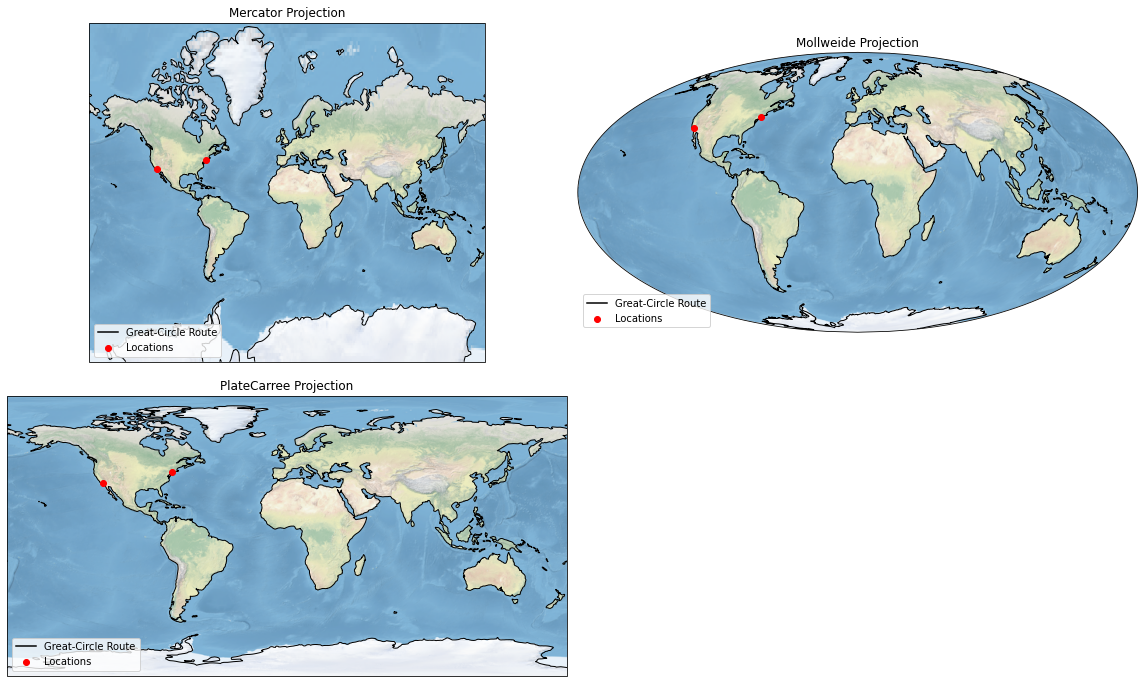

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.geodesic import Geodesic

# Function to plot routes on different projections
def plot_routes(lat1, lon1, lat2, lon2):
    """
    Plot the great-circle route between two points on different map projections.

    Args:
    lat1, lon1: Latitude and Longitude of the first point (degrees)
    lat2, lon2: Latitude and Longitude of the second point (degrees)
    """
    # Create a figure
    fig = plt.figure(figsize=(16, 10))

    # Define map projections to visualize
    projections = {
        "Mercator Projection": ccrs.Mercator(),
        "Mollweide Projection": ccrs.Mollweide(),
        "PlateCarree Projection": ccrs.PlateCarree()
    }

    # Iterate over projections
    for i, (name, proj) in enumerate(projections.items(), 1):
        ax = fig.add_subplot(2, 2, i, projection=proj)
        ax.set_title(name)
        ax.stock_img()  # Add a simple background image of Earth
        ax.coastlines()

        # Use Cartopy's Geodesic class to calculate great-circle paths
        geodesic = Geodesic()
        great_circle = geodesic.inverse([lon1, lon2], [lat1, lat2])

        # Extract the great-circle path
        lons, lats = great_circle[:, 0], great_circle[:, 1]

        # Plot the path
        ax.plot(lons, lats, color='black', transform=ccrs.Geodetic(), label="Great-Circle Route")
        ax.scatter([lon1, lon2], [lat1, lat2], color='red', transform=ccrs.PlateCarree(), zorder=5, label="Locations")

        # Add a legend
        ax.legend(loc="lower left")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Coordinates of two points (latitude, longitude in degrees)
    point1 = (40.748817, -73.985428)  # New York (Empire State Building)
    point2 = (34.052235, -118.243683)  # Los Angeles (Downtown)

    # Plot the routes
    plot_routes(*point1, *point2)


### **Convex Hull on a Sphere Visualization**

This script computes and visualizes the convex hull of a set of geographic locations on a sphere (Earth) in both 2D and 3D. The convex hull represents the smallest convex shape that encloses all given points on the Earth's surface. The script uses Cartopy for geographic projections and SciPy to calculate the convex hull. Below is an overview of the key components:

1. **spherical_to_cartesian**: This helper function converts geographic coordinates (latitude and longitude) to Cartesian coordinates (x, y, z). Since the convex hull algorithm operates in Cartesian space, the geographic points need to be transformed into this format. This function computes the Cartesian coordinates based on the spherical Earth model, where `lat` and `lon` are the latitude and longitude in degrees, and `radius` is the Earth’s radius (defaulted to 6371 km).

2. **convex_hull_on_sphere**: This function calculates the convex hull of a set of geographic points. It first converts the geographic coordinates to Cartesian coordinates using `spherical_to_cartesian`, and then computes the convex hull using SciPy’s `ConvexHull` class. The convex hull is a polygon (in 3D space) that encloses all the points, representing the smallest boundary around the set of points.

3. **plot_convex_hull_3d**: This function visualizes the convex hull in 3D using Matplotlib. It creates a 3D scatter plot for the points and then draws the convex hull in 3D space. The convex hull is shown as a red mesh surrounding the points. The plot ensures that the representation is spherical by scaling the plot to fit the Earth’s radius.

4. **plot_convex_hull_2d**: This function plots the convex hull in 2D on a map projection using Cartopy. The geographic points are plotted as blue dots, and the convex hull’s boundary is drawn in red. The function uses Cartopy’s `PlateCarree` projection for a global map view, providing a geographic context with coastlines.

5. **Visualization**:
   - The 3D plot uses a scatter plot to display the geographic points and a mesh to visualize the convex hull in 3D.
   - The 2D plot uses Cartopy’s `Mollweide` projection to plot the points and the convex hull’s boundary. The map also includes coastlines for geographic context.
   
6. **Example Usage**: The script takes a set of coordinates representing major cities around the world (New York, Los Angeles, Paris, Sydney, Tokyo, London, São Paulo, and Moscow). It computes the convex hull that encloses these cities and visualizes it in both 3D and 2D.

---

### **Real-World Applications:**

This script has several real-world applications, particularly in fields that require spatial analysis:

1. **Geospatial Analysis**: The convex hull is useful for determining the minimal boundary that encloses a set of geographic points. This can be used to analyze the extent of certain features or regions, such as urban areas, countries, or ecosystems.

2. **Urban Planning**: Urban planners can use the convex hull to calculate the smallest area containing a set of cities or services, helping to optimize infrastructure, transportation networks, or resource distribution.

3. **Aviation and Transportation**: The convex hull can be used to define the minimal area that covers a set of transportation hubs (e.g., airports), helping with logistics and route optimization for air travel.

4. **Environmental Studies**: In environmental research, the convex hull can be used to understand the area affected by environmental events, such as natural disasters, or to define conservation zones.

5. **Geography and Cartography**: Cartographers can use this technique to represent the boundary of a region or to understand the spatial relationships between geographic points on Earth’s surface. The convex hull provides a simple but effective way to analyze the outer limits of spatial data.

6. **Education and Research**: The script is also a useful educational tool for teaching geospatial concepts, such as convex hulls, spherical geometry, and the effects of different map projections on data representation.

---

### **Summary**:

This script demonstrates how to compute and visualize the convex hull of geographic locations on a sphere using both 2D map projections and 3D visualizations. It calculates the convex hull in Cartesian coordinates and then visualizes it in both dimensions. By applying this method, users can gain insights into the outer boundaries of geographic points, with applications in urban planning, aviation, and environmental analysis. The use of Cartopy and SciPy makes it easy to generate clear and informative visualizations.


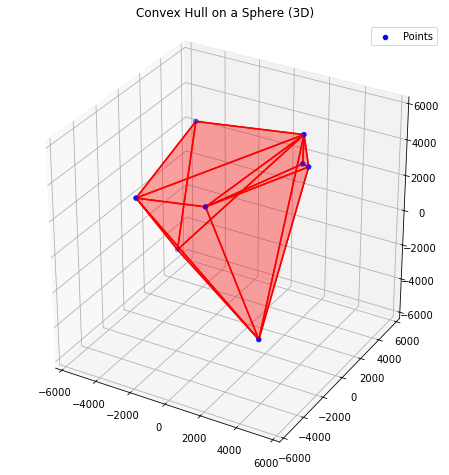

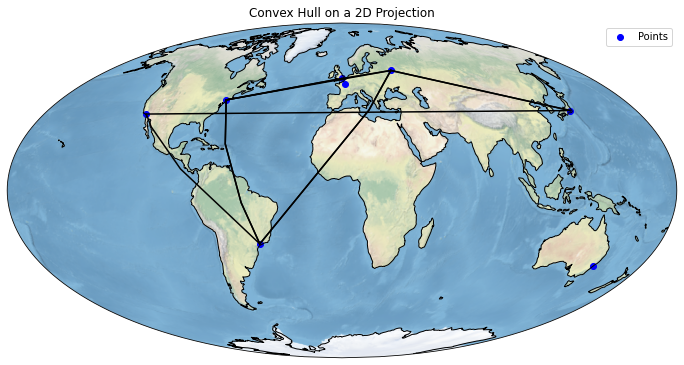

In [21]:
import numpy as np
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Helper function to convert spherical to Cartesian coordinates
def spherical_to_cartesian(lat, lon, radius=6371):
    lat, lon = np.radians(lat), np.radians(lon)
    x = radius * np.cos(lat) * np.cos(lon)
    y = radius * np.cos(lat) * np.sin(lon)
    z = radius * np.sin(lat)
    return np.array([x, y, z])

# Function to compute a convex hull on a sphere
def convex_hull_on_sphere(points):
    """
    Compute the convex hull of points on a sphere.

    Args:
    points: Array of latitude and longitude points [[lat1, lon1], [lat2, lon2], ...]

    Returns:
    hull_points: Indices of the points forming the convex hull
    """
    # Convert spherical to Cartesian coordinates
    cartesian_points = np.array([spherical_to_cartesian(lat, lon) for lat, lon in points])

    # Compute convex hull in Cartesian space
    hull = ConvexHull(cartesian_points)
    return hull, cartesian_points

# Function to visualize the convex hull in 3D
def plot_convex_hull_3d(hull, cartesian_points):
    """
    Visualize the convex hull in 3D.

    Args:
    hull: ConvexHull object
    cartesian_points: Cartesian coordinates of points
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(cartesian_points[:, 0], cartesian_points[:, 1], cartesian_points[:, 2], color='blue', label="Points")

    # Plot the convex hull
    for simplex in hull.simplices:
        simplex = np.append(simplex, simplex[0])  # Close the polygon
        ax.plot(cartesian_points[simplex, 0], cartesian_points[simplex, 1], cartesian_points[simplex, 2], color="red")

    # Plot hull faces
    ax.add_collection3d(Poly3DCollection(cartesian_points[hull.simplices], facecolors='red', alpha=0.2))

    # Make it spherical
    max_radius = np.max(np.linalg.norm(cartesian_points, axis=1))
    ax.set_xlim([-max_radius, max_radius])
    ax.set_ylim([-max_radius, max_radius])
    ax.set_zlim([-max_radius, max_radius])
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    plt.title("Convex Hull on a Sphere (3D)")
    plt.legend()
    plt.show()

# Function to plot convex hull in 2D projection
def plot_convex_hull_2d(points, hull, projection=ccrs.Mollweide()):
    """
    Visualize the convex hull on a 2D map projection.

    Args:
    points: Original spherical points [[lat1, lon1], [lat2, lon2], ...]
    hull: ConvexHull object
    projection: Cartopy projection for visualization
    """
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=projection)
    ax.set_global()
    ax.stock_img()
    ax.coastlines()

    # Plot all points
    lats, lons = zip(*points)
    ax.scatter(lons, lats, transform=ccrs.PlateCarree(), color='blue', label="Points")

    # Plot convex hull edges
    for simplex in hull.simplices:
        hull_points = np.array([points[simplex[0]], points[simplex[1]]])
        ax.plot(hull_points[:, 1], hull_points[:, 0], transform=ccrs.PlateCarree(), color='black')

    plt.title("Convex Hull on a 2D Projection")
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define random points on a sphere (latitude, longitude in degrees)
    points = np.array([
        [40.748817, -73.985428],  # New York
        [34.052235, -118.243683],  # Los Angeles
        [48.8566, 2.3522],  # Paris
        [-33.8688, 151.2093],  # Sydney
        [35.6895, 139.6917],  # Tokyo
        [51.5074, -0.1278],  # London
        [-23.5505, -46.6333],  # São Paulo
        [55.7558, 37.6173],  # Moscow
    ])

    # Compute convex hull
    hull, cartesian_points = convex_hull_on_sphere(points)

    # Visualize the convex hull
    plot_convex_hull_3d(hull, cartesian_points)
    plot_convex_hull_2d(points, hull)


---

### **SphereStats**: A Comprehensive Geospatial Analysis Library

**SphereStats** provides a robust suite of tools for geospatial analysis on spherical data. It includes a range of functions for calculating great-circle distances, plotting routes on maps, and performing geometric operations such as convex hulls, clustering, and proximity analysis. The library is designed to handle complex geospatial tasks, making it an ideal solution for applications in navigation, urban planning, environmental monitoring, and more.

With **SphereStats**, users can:

1. **Perform Distance Calculations**: Easily calculate great-circle distances between two points on Earth using the Haversine formula or geodesic methods.
2. **Route Plotting and Visualization**: Plot great-circle routes between two points on various map projections, visualizing the shortest paths and geographic contexts.
3. **Convex Hulls and Geometric Analysis**: Compute convex hulls to analyze the outer boundaries of point sets on a sphere and visualize them in 2D and 3D.
4. **Clustering and Proximity Queries**: Analyze and cluster points based on proximity or specific time thresholds, providing insights into geographical distribution and network behavior.
5. **Advanced Visualization**: Visualize geospatial data in various map projections (e.g., Mercator, Mollweide) and 3D, enabling better understanding of the spatial relationships between points.

These functions are designed to be modular and adaptable to a wide range of real-world geospatial challenges, offering users a versatile toolkit for geographic data analysis.

---

### **Real-World Applications**:

1. **Navigation and Routing**: Optimize travel routes and analyze the most efficient paths between two or more locations.
2. **Environmental Monitoring**: Track and analyze spatial patterns related to environmental data, such as climate change or wildlife movement.
3. **Urban Planning**: Use proximity analysis and clustering for resource allocation and city development strategies.
4. **Geospatial Research**: Aid in research across various fields by providing tools to model and analyze spherical data.
5. **Educational Tools**: Enhance understanding of geospatial concepts and the impact of different map projections in educational settings.

**SphereStats** empowers users to make informed decisions by providing precise geospatial tools for a wide array of use cases. Whether you're in urban planning, environmental science, or research, this library offers essential functions to support your projects and analyses.

---

### **Contact Information**:

For any questions or further inquiries, feel free to reach out:

- **Name**: Ghulam Abbas Zafari
- **Email**: [ghulamabbas.zafari@mail.polimi.it](mailto:ghulamabbas.zafari@mail.polimi.it)
- **GitHub**: [https://github.com/zafariabbas68](https://github.com/zafariabbas68)

